In [1]:
#Do not change these codes!
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
#Do not change these codes!
plt.rcParams["figure.figsize"] = (24, 12) #you can change this value!
Array = np.array

Complete these functions:

*   **Function *pad*:** if `size=(s_1, s_2)`, add $⌈$ `s_1/2` $⌉$ zero columns to the left and $⌊$ `s_1/2` $⌋$ zero columns to the right side of the image `img` if `s_1` is odd and `s_1/2` zero columns to both of them if `s_1` is even, and add $⌈$ `s_2/2` $⌉$ zero rows to the top and $⌊$ `s_2/2` $⌋$ zero rows to the bottom of the image `img` if `s_2` is odd and `s_2/2` zero rows to both of them if `s_2` is even. If `size` is an integer, `s_1=s_2`.
*   **Function *convolve***: perform the matrix convolution. If `padding=None`, call function *pad* with `size=(k_w - 1, k_h - 1)` before performing the convolution, where `k_w` and `k_h` are respectively the width and the height of the kernel `ker`. Otherwise, call function *pad* with `size=padding`. If `stride` is an integer, stride the kernel `ker` across the image `img` `stride` columns and down the image `img` `stride` rows. Otherwise, if `stride=(s_1, s_2)`, stride the kernel `ker` accross the image `img` `s_1` columns and down the image `img` `s_2` rows.



In [3]:
def pad(image: np.ndarray, size=0) -> np.ndarray:
    # Pad the input image with zeros
    padded_image = np.pad(image, ((size, size), (size, size), (0, 0)), mode='constant')
    return padded_image

def convolve(image: np.ndarray, kernel: np.ndarray, padding=None, stride=1) -> np.ndarray:
    # Check if the kernel is square
    assert kernel.shape[0] == kernel.shape[1], "Kernel must be square"
    
    # Get the dimensions of the input image and kernel
    i_h, i_w, n_channels = image.shape
    k_size = kernel.shape[0]
    
    # Calculate the output dimensions based on input, kernel, padding, and stride
    if padding is None:
        padding = (k_size - 1) // 2
    o_h = int((i_h + 2 * padding - k_size) / stride) + 1
    o_w = int((i_w + 2 * padding - k_size) / stride) + 1
    
    # Create an empty output array
    output = np.zeros((o_h, o_w, n_channels))
    
    # Pad the input image
    padded_image = pad(image, padding)
    
    # Loop over each pixel in the output array
    for i in range(o_h):
        for j in range(o_w):
            # Calculate the range of pixels in the input image that correspond to the current output pixel
            i_start = i * stride
            i_end = i_start + k_size
            j_start = j * stride
            j_end = j_start + k_size
            
            # Extract the corresponding region of the input image
            image_region = padded_image[i_start:i_end, j_start:j_end, :]
            
            # Apply the kernel to each color channel separately and sum the results
            for c in range(n_channels):
                output[i, j, c] = np.sum(image_region[:, :, c] * kernel)
    
    return output

Plotting

In [4]:
sample = 'sample.jpg'
img = Image.open(sample)
img_w, img_h = img.width, img.height
img = np.asarray(img.getdata()).reshape((img_h, img_w, -1))

In [5]:
#blur
gaussian_ker = Array([[1, 2, 1],
                      [2, 4, 2],
                      [1, 2, 1]]) * (1 / 16)
#sharpen
sharpen_ker = Array([[0, -1, 0],
                         [-1, 5, -1],
                         [0, -1, 0]])

#rigde
ridge_ker = Array([[0, -1, 0],
                         [-1, 4, -1],
                         [0, -1, 0]])

#emboss
emboss_ker = Array([[-2,-1,0],
                      [-1,1,1],
                      [0,1,2]])
#sobel_x_kernel
sobel_x_kernel = Array([[-1,0,1],
                      [-2,0,2],
                      [-1,0,1]])
#sobel_y_kernel
sobel_y_kernel = Array([[-1,-2,-1],
                      [0,0,0],
                      [1,2,1]])

#try with other kernels!

In [6]:
gaussian_img = convolve(image=img, kernel=gaussian_ker, stride=1)
sharpen_img = convolve(image=img, kernel=sharpen_ker, stride=1)
ridge_img = convolve(image=img, kernel=ridge_ker, stride=1)
sobel_x_img = convolve(image=img, kernel=sobel_x_kernel, stride=1)
sobel_y_img = convolve(image=img, kernel=sobel_y_kernel, stride=1)

gaussian_img = np.clip(gaussian_img, 0, 255)
sharpen_img = np.clip(sharpen_img, 0, 255)
ridge_img = np.clip(ridge_img, 0, 255)
sobel_x_img = np.clip(sobel_x_img, 0, 255)
sobel_y_img = np.clip(sobel_y_img, 0, 255)

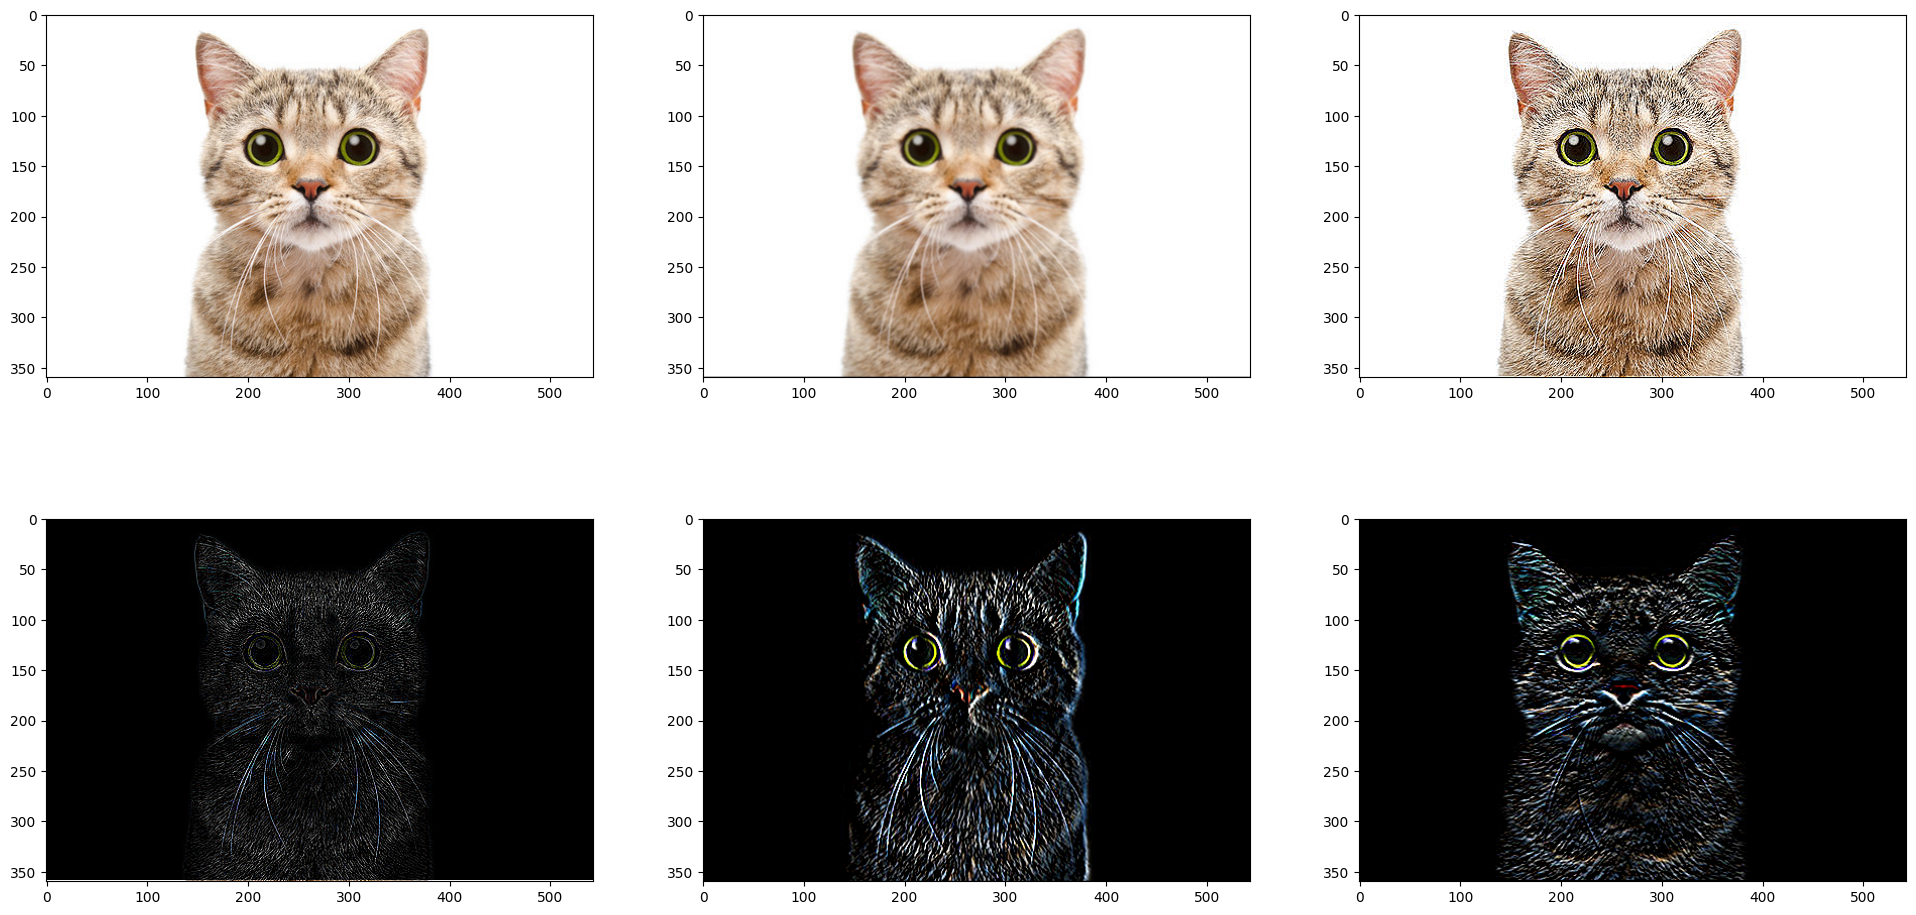

In [7]:
fig, ax = plt.subplots(2, 3)
ax[0, 0].imshow(img)
ax[0, 1].imshow(gaussian_img.astype('uint8'))
ax[0, 2].imshow(sharpen_img.astype('uint8'))
ax[1, 0].imshow(ridge_img.astype('uint8'))
ax[1, 1].imshow(sobel_x_img.astype('uint8'))
ax[1, 2].imshow(sobel_y_img.astype('uint8'))

In [8]:
#Leave this empty!